In [ ]:
!pip install git+https://github.com/google-research/timesfm.git

  Cloning https://github.com/google-research/timesfm.git to /tmp/pip-req-build-moqf9mmp
  Running command git clone --filter=blob:none --quiet https://github.com/google-research/timesfm.git /tmp/pip-req-build-moqf9mmp
  Resolved https://github.com/google-research/timesfm.git to commit 5950ef0653e4ff142a80906a08432cc457a2ace9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.1 MB/s eta 0:00:00
  Created wheel for timesfm: filename=timesfm-1.2.9-py3-none-any.whl size=54967 sha256=9b5a7411614cc100e5df1832388721c05c5488a95e87e1ffef12ef8a77b774e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-9o9u17is/wheels/15/82/86/25cb4996f164a9e58ff452725de32b56291a099a808d2b4c14
Successfully built timesfm


In [ ]:
import numpy as np
import pandas as pd
import timesfm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0].


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/Dataset/VALE.xlsx")
df['ds'] = pd.to_datetime(df['date'])
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,unique_id,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ds
0,1,2015-07-01,2640.041260,2684.041947,2625.374364,2640.041260,2961800,0.0,0,2015-07-01
1,1,2015-07-02,2649.818994,2669.374854,2615.596240,2635.152100,3344100,0.0,0,2015-07-02
2,1,2015-07-03,2635.152100,2640.041065,2620.485205,2635.152100,2790000,0.0,0,2015-07-03
3,1,2015-07-06,2620.485450,2635.152346,2591.151658,2610.707520,2330300,0.0,0,2015-07-06
4,1,2015-07-07,2610.707569,2625.374465,2591.151707,2605.818604,1628900,0.0,0,2015-07-07
...,...,...,...,...,...,...,...,...,...,...
2419,1,2025-04-23,2600.000000,2600.000000,2420.000000,2450.000000,19213600,0.0,0,2025-04-23
2420,1,2025-04-24,2450.000000,2530.000000,2420.000000,2440.000000,17237600,0.0,0,2025-04-24
2421,1,2025-04-25,2460.000000,2560.000000,2460.000000,2510.000000,14385700,0.0,0,2025-04-25
2422,1,2025-04-28,2530.000000,2540.000000,2480.000000,2510.000000,4893500,0.0,0,2025-04-28


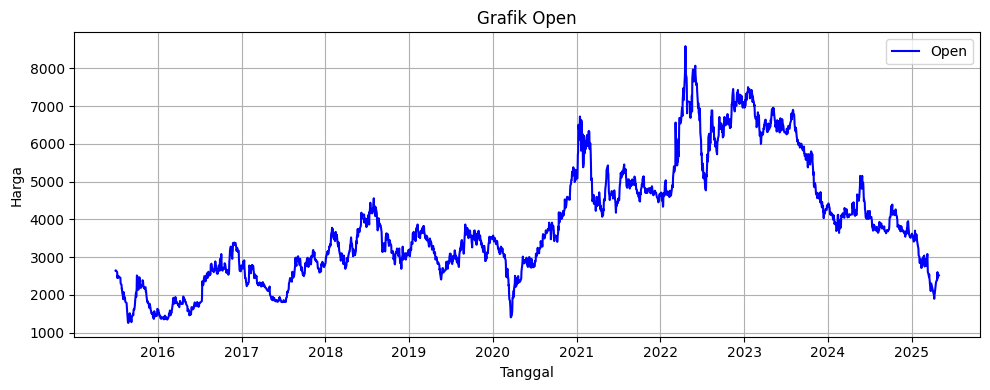

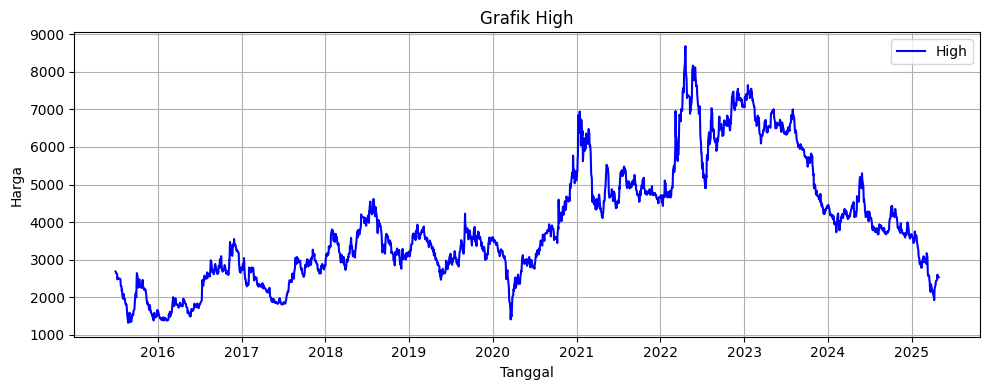

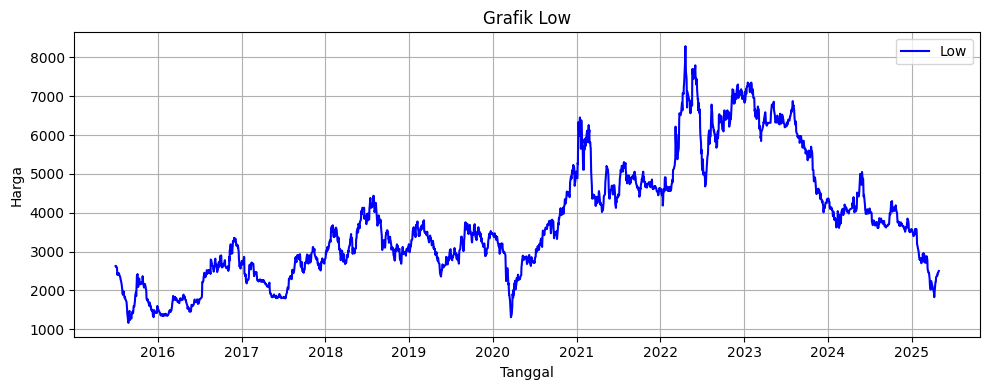

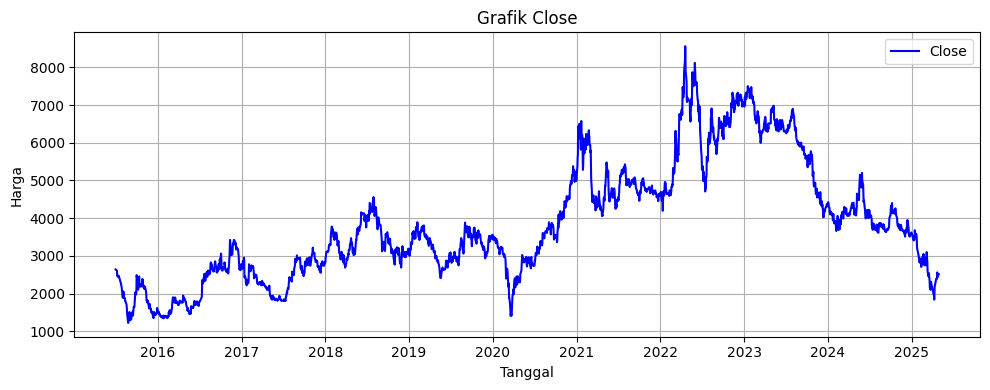

In [ ]:
import matplotlib.pyplot as plt

# Pastikan kolom 'date' jadi indeks
df = df.set_index('date')

# Buat list kolom yang ingin divisualisasikan
columns_to_plot = ['Open', 'High', 'Low', 'Close']
for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[col], label=col.capitalize(), color='blue')
    plt.title(f'Grafik {col.capitalize()}')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


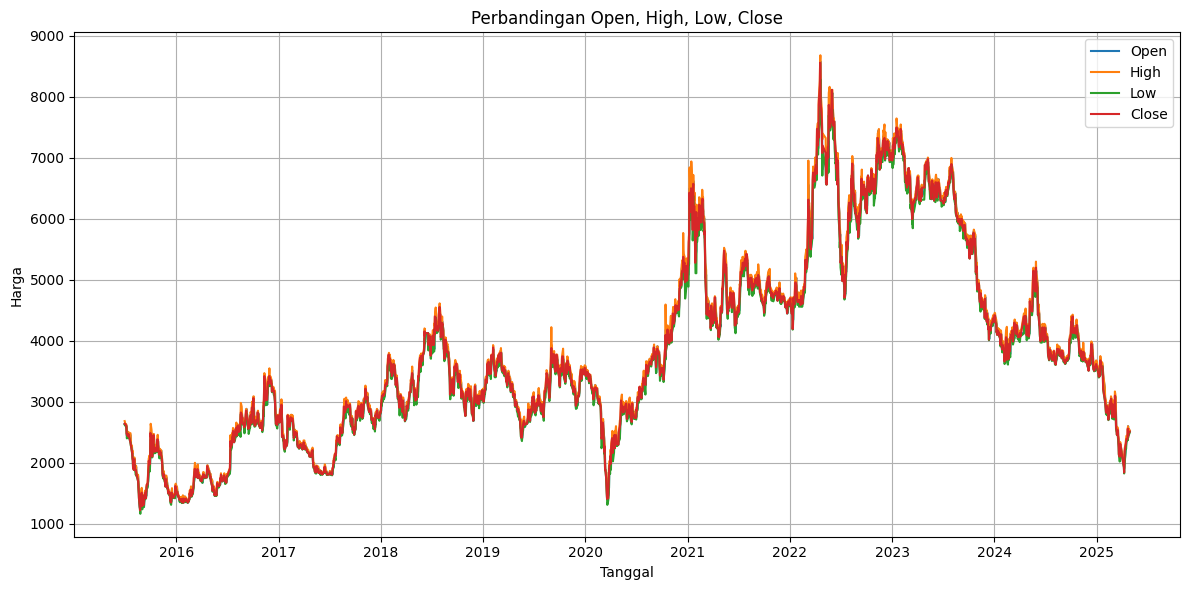

In [ ]:
plt.figure(figsize=(12, 6))
for col in columns_to_plot:
    plt.plot(df.index, df[col], label=col.capitalize())

plt.title('Perbandingan Open, High, Low, Close')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = df.rename(columns={'date': 'ds', 'Close': 'y'})
print(df.columns)
df

Index(['unique_id', 'Open', 'High', 'Low', 'y', 'Volume', 'Dividends',
       'Stock Splits', 'ds'],
      dtype='object')


,unique_id,Open,High,Low,y,Volume,Dividends,Stock Splits,ds
date,,,,,,,,,
2015-07-01,1,2640.041260,2684.041947,2625.374364,2640.041260,2961800,0.0,0,2015-07-01
2015-07-02,1,2649.818994,2669.374854,2615.596240,2635.152100,3344100,0.0,0,2015-07-02
2015-07-03,1,2635.152100,2640.041065,2620.485205,2635.152100,2790000,0.0,0,2015-07-03
2015-07-06,1,2620.485450,2635.152346,2591.151658,2610.707520,2330300,0.0,0,2015-07-06
2015-07-07,1,2610.707569,2625.374465,2591.151707,2605.818604,1628900,0.0,0,2015-07-07
...,...,...,...,...,...,...,...,...,...
2025-04-23,1,2600.000000,2600.000000,2420.000000,2450.000000,19213600,0.0,0,2025-04-23
2025-04-24,1,2450.000000,2530.000000,2420.000000,2440.000000,17237600,0.0,0,2025-04-24
2025-04-25,1,2460.000000,2560.000000,2460.000000,2510.000000,14385700,0.0,0,2025-04-25


In [ ]:
df = df.reset_index(drop=True)
split_index = int(0.9 * len(df))
split_date = df.loc[split_index, 'ds']

train_df = df[df['ds'] <= split_date]
test_df = df[df['ds'] > split_date]

In [ ]:
train_df

,unique_id,Open,High,Low,y,Volume,Dividends,Stock Splits,ds
0,1,2640.041260,2684.041947,2625.374364,2640.041260,2961800,0.0,0,2015-07-01
1,1,2649.818994,2669.374854,2615.596240,2635.152100,3344100,0.0,0,2015-07-02
2,1,2635.152100,2640.041065,2620.485205,2635.152100,2790000,0.0,0,2015-07-03
3,1,2620.485450,2635.152346,2591.151658,2610.707520,2330300,0.0,0,2015-07-06
4,1,2610.707569,2625.374465,2591.151707,2605.818604,1628900,0.0,0,2015-07-07
...,...,...,...,...,...,...,...,...,...
2177,1,4130.000000,4450.000000,4120.000000,4400.000000,48418100,0.0,0,2024-04-16
2178,1,4420.000000,4450.000000,4250.000000,4270.000000,29768300,0.0,0,2024-04-17
2179,1,4300.000000,4390.000000,4230.000000,4310.000000,20382500,0.0,0,2024-04-18
2180,1,4340.000000,4410.000000,4180.000000,4400.000000,34149500,0.0,0,2024-04-19


In [ ]:
test_df

,unique_id,Open,High,Low,y,Volume,Dividends,Stock Splits,ds
2182,1,4440.0,4450.0,4340.0,4350.0,21161800,0.0,0,2024-04-23
2183,1,4350.0,4350.0,4210.0,4210.0,16263000,0.0,0,2024-04-24
2184,1,4210.0,4240.0,4050.0,4100.0,19166500,0.0,0,2024-04-25
2185,1,4120.0,4130.0,4010.0,4090.0,11182000,0.0,0,2024-04-26
2186,1,4090.0,4190.0,4080.0,4180.0,6838500,0.0,0,2024-04-29
...,...,...,...,...,...,...,...,...,...
2419,1,2600.0,2600.0,2420.0,2450.0,19213600,0.0,0,2025-04-23
2420,1,2450.0,2530.0,2420.0,2440.0,17237600,0.0,0,2025-04-24
2421,1,2460.0,2560.0,2460.0,2510.0,14385700,0.0,0,2025-04-25
2422,1,2530.0,2540.0,2480.0,2510.0,4893500,0.0,0,2025-04-28


In [ ]:
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          context_len=512,
          horizon_len=242,
          input_patch_len=32,
          output_patch_len=128,
          num_layers=20,
          model_dims=1280,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
  )

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
timesfm_forecast = tfm.forecast_on_df(
    inputs=train_df,
    freq="D",
    value_name="y",
    num_jobs=-1,
    )
timesfm_forecast

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,1,2024-04-23,4292.993652,4121.378906,4172.245605,4219.704102,4276.005859,4292.993652,4331.363281,4376.041016,4424.699219,4498.297852
1,1,2024-04-24,4255.440430,4003.579346,4088.230469,4164.986816,4208.742188,4255.440430,4314.238281,4355.907715,4416.037109,4523.474609
2,1,2024-04-25,4277.005859,3968.972168,4085.664551,4142.453125,4196.483887,4277.005859,4311.625977,4366.237305,4434.305176,4557.402344
3,1,2024-04-26,4232.105469,3918.232422,4024.561768,4125.966797,4159.796387,4232.105469,4306.055664,4346.154785,4426.385742,4567.362305
4,1,2024-04-27,4227.345703,3903.254395,4023.510254,4090.040039,4169.677734,4227.345703,4281.208008,4362.187988,4424.880859,4555.344727
...,...,...,...,...,...,...,...,...,...,...,...,...
237,1,2024-12-16,5143.761719,4486.010742,4722.069336,4877.532227,5012.634766,5143.761719,5252.125977,5368.705566,5512.015137,5735.930176
238,1,2024-12-17,5148.795898,4479.881836,4726.162598,4904.570801,5022.959473,5148.795898,5258.006348,5377.189941,5518.972168,5746.678711
239,1,2024-12-18,5145.333984,4494.375000,4735.057617,4896.666992,5027.916016,5145.333984,5261.484375,5378.026367,5528.181152,5755.358887
240,1,2024-12-19,5146.192871,4493.372559,4732.128906,4904.439941,5036.535156,5146.192871,5267.160156,5388.530762,5535.929688,5767.953125


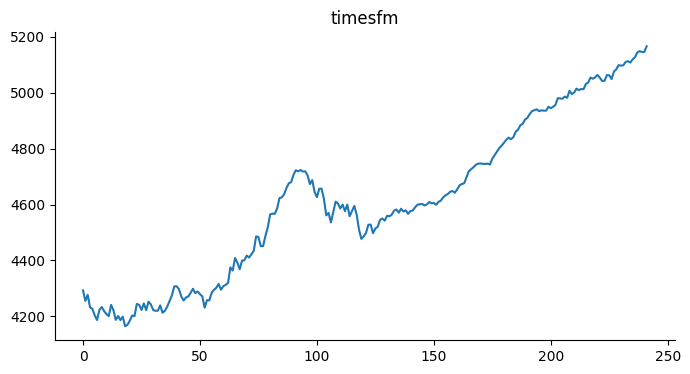

In [ ]:
# @title timesfm

from matplotlib import pyplot as plt
timesfm_forecast['timesfm'].plot(kind='line', figsize=(8, 4), title='timesfm')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
timesfm_forecast = timesfm_forecast[["ds","timesfm"]]
timesfm_forecast

,ds,timesfm
0,2024-04-23,4292.993652
1,2024-04-24,4255.440430
2,2024-04-25,4277.005859
3,2024-04-26,4232.105469
4,2024-04-27,4227.345703
...,...,...
237,2024-12-16,5143.761719
238,2024-12-17,5148.795898
239,2024-12-18,5145.333984
240,2024-12-19,5146.192871


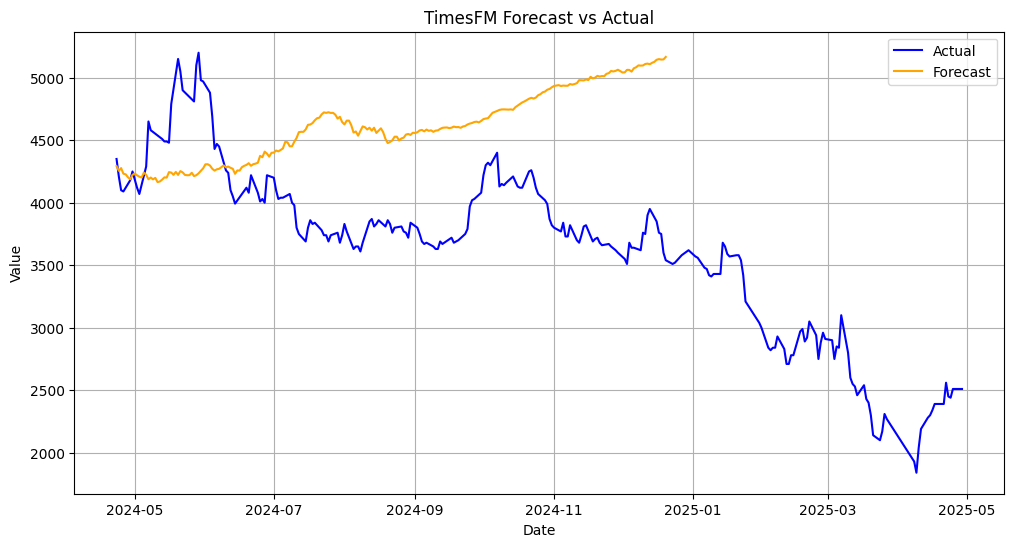

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_df['ds'], test_df['y'], label='Actual', color='blue')
plt.plot(timesfm_forecast['ds'], timesfm_forecast['timesfm'], label='Forecast', color='orange')
plt.title('TimesFM Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- 7. Evaluasi metrik ---
actual = test_df['y'].values[:len(timesfm_forecast)]
predicted = timesfm_forecast['timesfm'].values
mape = mean_absolute_percentage_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
r2 = r2_score(actual, predicted)

print(f"📊 Evaluasi TimesFM:")
print(f"- MAPE: {mape:.4f}")
print(f"- MSE : {mse:.4f}")
print(f"- R² Score: {r2:.4f}")

📊 Evaluasi TimesFM:
- MAPE: 0.3567
- MSE : 1819696.8066
- R² Score: -3.1101


In [ ]:
comparison_df = pd.merge(timesfm_forecast, test_df[['ds', 'y']], on='ds', how='inner')
comparison_df

,ds,timesfm,y
0,2024-04-23,4292.993652,4350.0
1,2024-04-24,4255.440430,4210.0
2,2024-04-25,4277.005859,4100.0
3,2024-04-26,4232.105469,4090.0
4,2024-04-29,4187.086914,4180.0
...,...,...,...
160,2024-12-16,5143.761719,3850.0
161,2024-12-17,5148.795898,3760.0
162,2024-12-18,5145.333984,3750.0
163,2024-12-19,5146.192871,3600.0


In [ ]:
def calculate_error_metrics(actual, predicted, num_predictors=1):
  # convert inputs are numpy arrays
  actual = np.array(actual)
  predicted = np.array(predicted)
  # Number of observations
  n = len(actual)
  # Calculate MSE
  mse = mean_squared_error(actual, predicted)
  # Calculate RMSE
  rmse = np.sqrt(mse)
  # Calculate MAPE
  mape = mean_absolute_percentage_error(actual, predicted)
  # Calculate R-squared
  r2 = r2_score(actual, predicted)
  # Calculate Adjusted R-squared
  adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
  print(f'MSE : {mse}')
  print(f'RMSE : {rmse}')
  print(f'MAPE : {mape}')
  print(f'r2 : {r2}')
  print(f'adjusted_r2 : {adjusted_r2}')

In [ ]:
# Sesuaikan agar evaluasi dilakukan hanya pada tanggal yang match
Y_test_aligned = test_df[test_df['ds'].isin(timesfm_forecast['ds'])]
forecast_aligned = timesfm_forecast[timesfm_forecast['ds'].isin(Y_test_aligned['ds'])]

In [ ]:
calculate_error_metrics(Y_test_aligned['y'], forecast_aligned['timesfm'])

MSE : 732988.3772308443
RMSE : 856.1474039152629
MAPE : 0.19656471104354173
r2 : -4.712396746685194
adjusted_r2 : -4.747442125499213


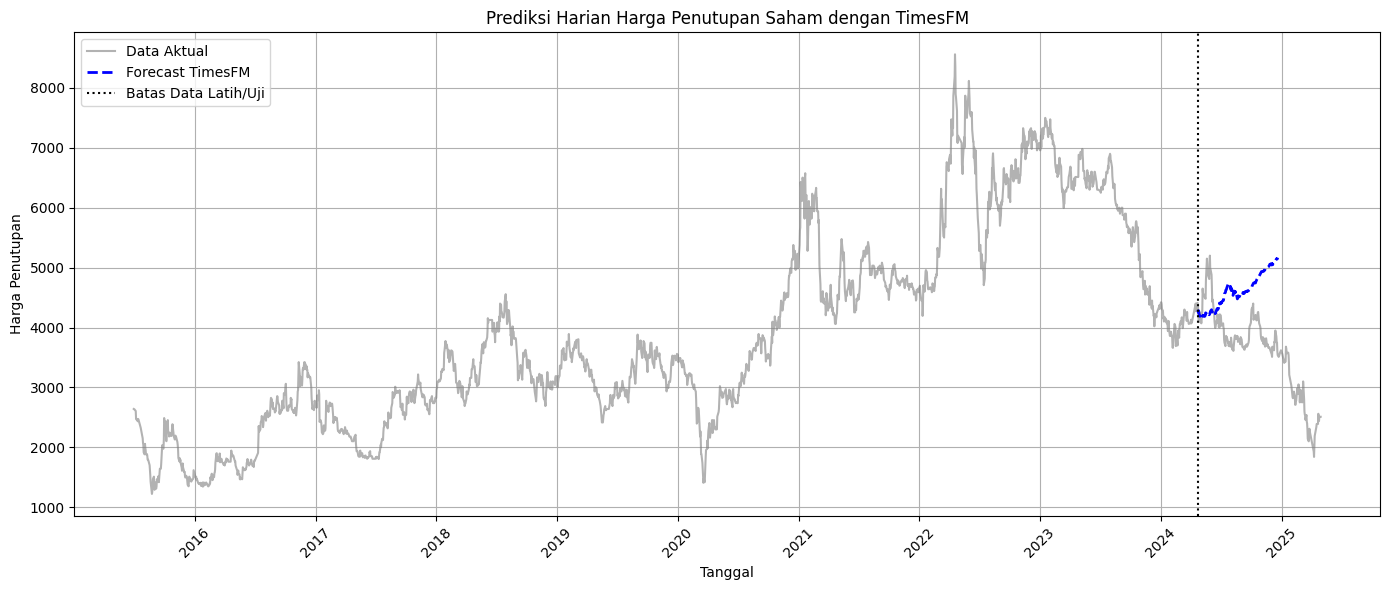

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df["ds"], df["y"], label="Data Aktual", color="gray", alpha=0.6)
plt.plot(forecast_aligned['ds'], forecast_aligned['timesfm'], label='Forecast TimesFM', color="blue", linestyle="--", linewidth=2)
plt.axvline(x=split_date, color='black', linestyle=':', label='Batas Data Latih/Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.title('Prediksi Harian Harga Penutupan Saham dengan TimesFM')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()